In [1]:
import cifar10
import matplotlib.pyplot as plt

In [2]:
cifar10.data_path = "data/CIFAR-10/"

In [3]:
cifar10.maybe_download_and_extract()

Data has apparently already been downloaded and unpacked.


In [4]:
class_names = cifar10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [5]:
images_train, cls_train, labels_train = cifar10.load_training_data()
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


In [6]:
images_test.shape

(10000, 32, 32, 3)

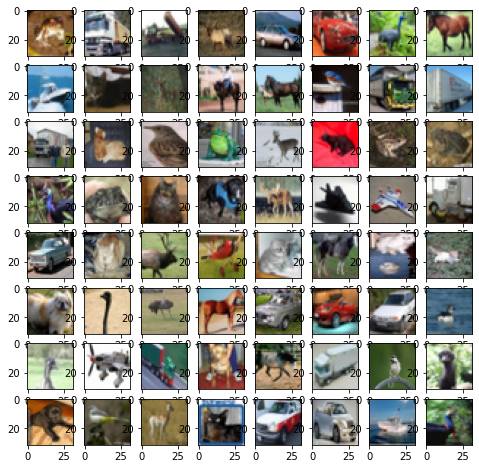

In [7]:
fig = plt.figure(figsize = (8,8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(images_train[i] )#, cmap = plt.cm.bone)
plt.show()

In [8]:
x_train = images_train.reshape(50000, 3072)
x_test = images_test.reshape(10000, 3072)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [ ]:
pca = PCA()
pca.fit_transform(x_train)
total = sum(pca.explained_variance_)
current = 0
k = 0
while(current/total < 0.95):
    current += pca.explained_variance_[k]
    k += 1
print(k)

In [ ]:
pca = PCA(n_components = 217, whiten = True)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

In [ ]:
from sklearn.model_selection import cross_val_score,KFold,GridSearchCV
clf = SVC()
grid = {'C':[1e2,1e4,1e1,5e3,1e3,5e2],'gamma':[1e-3,1e-2,5e-3,5e-2,1e-4,1e-5]}
abc = GridSearchCV(clf, grid, n_jobs = 1)
abc.fit(x_train_pca, cls_train)
y_pred = abc.predict(x_test_pca)
print(abc.score(x_test_pca, cls_test))

In [ ]:
import numpy as np
dt=np.dtype('U25')
output=np.empty((10000),dtype=dt) 
for i in range(len(y_pred)):
    output[i]=class_names[y_pred[i]]

In [ ]:
np.savetxt("cifar.csv", output,fmt=',')